#### Nama : Wildanah Sirad
#### NIM  : 2209106062
###  Posttest 3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import file CSV ke dalam DataFrame Pandas

In [3]:
wp = pd.read_csv('world_population.csv')

### 1. Data Cleaning(Handling missing value (jika ada))

In [4]:
# pengecekan missing value
wp.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

### 1. Data Cleaning(Handling duplicate value (jika ada))

In [5]:
# pengecekan duplicate value
duplicate = wp.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


### 1. Data Cleaning(Handling outlier (jika ada))

<AxesSubplot: ylabel='Density (per km²)'>

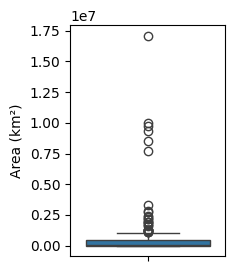

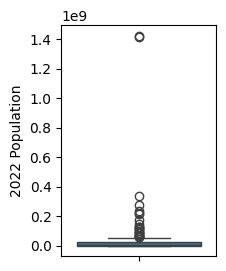

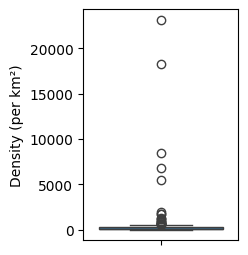

In [6]:
# Membuat boxplot untuk kolom 'Area (km²)'
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(wp['Area (km²)']) #buat boxplot

# Membuat boxplot untuk kolom '2022 Population'
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(wp['2022 Population']) #buat boxplot

# Membuat boxplot untuk kolom 'Density (per km²)'
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(wp['Density (per km²)']) #buat boxplot

#### Handling outlier
Disini, saya memutuskan untuk tidak menghapus outlier dikarenakan outlier pada dataset saya yaitu "World Population Dataset" yang merupakaan data untuk populasi global adalah hal yang wajar karena:
- Outlier tersebut mencerminkan variasi yang sangat relevan secara geografis dan demografis. Misalnya Distribusi Populasi yang Heterogen contoh negara dengan populasi besar seperti Amerika Serikat atau Indonesia mungkin dianggap outliers dibandingkan negara-negara kecil seperti Vatican City atau Monaco yang memiliki populasi sangat kecil, tetapi informasi ini penting untuk dianalisis secara keseluruhan.
- Menghapus outlier bisa menyebabkan hilangnya informasi kritis yang diperlukan untuk analisis yang valid.
- Outliers seperti populasi besar atau kecil, dan area luas atau sempit, adalah bagian penting yang memberikan gambaran yang realistis tentang keadaan dunia, memungkinkan analisis yang lebih lengkap, dan menghindari kehilangan informasi krusial.

### 2. Normalisasi/standarisasi kolom numerik

In [7]:
from sklearn.preprocessing import MinMaxScaler

#Menginisialisasi Min Max Scaller
scaler = MinMaxScaler(feature_range=(0,1))

#Numerical Columns
num_col_ = [col for col in wp.columns if
wp[col].dtypes != 'O' and col != 'Id']
x1 = wp[num_col_]
#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,0.150215,0.028844,0.027350,0.024218,0.020909,0.015460,0.009269,0.012710,0.013072,0.038146,0.002720,0.723743,0.029083
1,0.587983,0.001993,0.002012,0.002068,0.002161,0.002517,0.002855,0.002994,0.002825,0.001681,0.004266,0.532782,0.002237
2,0.141631,0.031491,0.030494,0.028372,0.026595,0.024345,0.022118,0.019075,0.016772,0.139297,0.000812,0.664545,0.031320
3,0.909871,0.000031,0.000032,0.000036,0.000040,0.000046,0.000041,0.000033,0.000032,0.000012,0.009600,0.452578,0.000000
4,0.866953,0.000056,0.000054,0.000051,0.000053,0.000052,0.000046,0.000036,0.000023,0.000027,0.007360,0.623806,0.000000


### 3. Encoding kolom kategorikal

In [8]:
enc = pd.get_dummies(wp[["Continent"]])
wp = wp.join(enc)
wp.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,652230,63.0587,1.0257,0.52,0,1,0,0,0,0
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,...,28748,98.8702,0.9957,0.04,0,0,1,0,0,0
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,...,2381741,18.8531,1.0164,0.56,1,0,0,0,0,0
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,...,199,222.4774,0.9831,0.00,0,0,0,0,1,0
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,...,468,170.5641,1.0100,0.00,0,0,1,0,0,0


### 4. Feature engineering (minimal 1 feature baru)

In [9]:
# Feature Engineering: Membuat kategori berdasarkan Density (per km²)
# Membuat batas-batas kategori density
density_bins = [0, 50, 100, 500, 1000, float('inf')]

# Memberikan label untuk setiap kategori density
density_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Membuat kolom baru 'Density_Category' yang berisi kategori density berdasarkan pembagian bins
wp['Density_Category'] = pd.cut(wp['Density (per km²)'], bins=density_bins, labels=density_labels)

# Menampilkan hasil dari kolom baru 'Density_Category' bersama kolom 'Density (per km²)'
wp[['Density (per km²)', 'Density_Category']].head()


,Density (per km²),Density_Category
0,63.0587,Low
1,98.8702,Low
2,18.8531,Very Low
3,222.4774,Medium
4,170.5641,Medium


### 5. Splitting data ke dalam data training & data testing

In [10]:
from sklearn.model_selection import train_test_split

# Memisahkan feature (X) dan target (y)
# X adalah semua kolom kecuali '2022 Population' (sebagai target)
X = wp.drop(columns=['2022 Population'])  # Feature
y = wp['2022 Population']  # Target

# Membagi data menjadi data training dan data testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi dari data training dan testing untuk X dan y
print('Dimensi X train: ', X_train.shape)
print('Dimensi X test: ', X_test.shape)
print('Dimensi y train: ', y_train.shape)
print('Dimensi y test: ', y_test.shape)


Dimensi X train:  (187, 23)
Dimensi X test:  (47, 23)
Dimensi y train:  (187,)
Dimensi y test:  (47,)
